# BBN-simple: a code for simplified and pedagogical Big Bang Nucleosynthesis

This code is a pedagogical approach to light-element Big Bang Nucleosynthesis (BBN) stripped to its simplest physics. It is aimed at an advanced undergraduate or precandidate interested in the most fundamental necessary physics to consider the problem of BBN.

This code and its associated publication were written by Aidan Meador-Woodruff and Dragan Huterer of the University of Michigan in the Lienweber Center for Theoretical Physics. Our emails are aidanmw@umich.edu and huterer@umich.edu, respectively.

#### Section 0: Constants, Functions, and Import Statements: Typical Pythonic Things

In [1]:
### IMPORT STATEMENTS ###
import numpy as np
import math
from scipy.special import *
from scipy.optimize import *
from scipy import interpolate
from scipy.integrate import *
import matplotlib
from matplotlib import pyplot as plt

# ----------------------------------- #
### CONSTANTS ###

## Numbers ##
pi = np.pi
apery = zeta(3)

## Masses ##
me = 0.510998 # Mass of electron in [MeV/c^2]
mp = 938.272013 # Mass of proton in [MeV/c^2]
mn = 939.565346 # Mass of neutron in [MeV/c^2]
md = 1875.612793 # Mass of Deuterium in [MeV/c^2]
mt = 2808.920906 # Mass of Tritium in [MeV/c^2]
m3 = 2808.391383 # Mass of Helium-3 in [MeV/c^2]
m4 = 3727.379109 # Mass of Helium-4 (Alpha) in [MeV/c^2]
mli6 = 5603.05141 # Mass of Lithium-6 in [MeV/c^2]
mli7 = 6533.833166 # Mass of Lithium-7 in [MeV/c^2]
mbe7 = 6534.184060 # Mass of Beryllium-7 in [MeV/c^2]
Q = 939.5654133 - 938.2720813 # Proton-Neutron Mass Difference in [MeV/c^2]
amu = 931.494003 # AMU in MeV
q = Q/me # Exponential NSE Mass ratio [unitless]

## Energies ##
Bd = 2.224 # Binding Energy of Deuterium in [MeV]
Bt = 8.50 # Binding Energy of Tritium in [MeV]
B3 = 7.718 # Binding Energy of Helium-3 in [MeV]
B4 = 28.295 # Binding Energy of Helium-4 (Alpha) in [MeV]
Bli7 = 39.2 # Binding Energy of Lithum-7 in [MeV]
Bbe7=37.6 # Binding Energy of Beryllium-7 in [MeV]

## General Physical Units ##
G = 6.67e-45 # Gravitational Constant [] 
c = 2.99e10 # Speed of Light [cm/s]
kB = 8.617e-11 # Boltzmann Constant [MeV/Kelvin]
hbar = 6.582e-22 # Reduced Planck constant h/2pi [MeV s]
NA = 6.022e23 # Avogadro's number [# molecules/mole]

## Particle Physics Units ##
gA = 1.26 # Axial vector corretion for weak charge nucleon rxns between p and n. [scalar]
GF = 1.1663787e-5*1e-6 # Fermi coupling constant in [MeV^-2]
RadConst = (np.pi**2)/15 # Radiation constant for Radiation pressures [unitless]

## Free Parameters ##
N𝜈 = 3.046 # Number of neutrino flavors [unitless]
taun = 880.20 # Average lifetime of a neutron before decay [s]
η0 = 6.12e-10 #1.2e-9 # The present day ratio of baryons to photons [unitless, number density]

# ----------------------------------- #
### USEFUL CONVERSIONS ###
def K9toMeV(T):
    'Converts T9 to T in MeV.'
    
    K = 8.619e-5 # 1 Kelvin to eV/kB
    K9 = K*1e9 # 10^9 Kelvin in eV/kB
    MeV = K9/1e6 # 10^9 Kelvin in MeV/kB
    return MeV*T

def MeVtoK9(T):
    'Converts T in MeV to T9'
    eV = 1/(8.619e-5) # 1 eV/kB to Kelvin
    MeV = eV*1e6 # Converting MeV to eV/kB
    K9 = MeV/1e9 # Converting Kelvin to 10^9 Kelvin
    return K9*T

#### Section 1: Thermodynamics and the Time-Temperature Relationship


To begin with BBN, we must lay the groundwork of thermodynamics in the early universe. In our cake analogy, this is the equivalent of creating our oven and preheating it to the appropriate temperature. The evolution of photon and neutrino temperature with resepct to time are driven by the expansion of space after the Big Bang. The expansion of space and its thermodynamic consequences are the primary driver of BBN. 

To relate the evolution of time after the Big Bang and the temperature of radiation, we must use the Friedmann equations. We will use the fiducial values for a Flat, $\Lambda$ CDM universe in this notebook. We will assume a basic understanding of cosmology, at least to the degree of Kolb & Turner's *The Early Universe* (1994) or Ryden's *Introduction to Cosmology* (2016).

### Friedmann Equations

There are two independent Friedmann equations. They are, (for zero curvature):

$$H^2 \equiv \left(\frac{\dot a}{a}\right)^2 = \frac{8\pi G}{3}\rho_{\rm tot} \tag{1}$$
and
$$\frac{\ddot a}{a} = - \frac{4\pi G}{3} (\rho + 3P) \tag{2}$$

Where $a$, $\rho$, and $P$ are the scale factor, energy densities, and radiation pressure, respectively. A third crucially important equation is the so-called continuity equation, which lets us calculate the time derivatives of energy densities. It is 

$$\dot \rho + 3H(\rho + P) = 0 \tag{3}$$

By use of the First Law of Thermodynamics and the thermodynamic integrability condition, we arrive at the equivalent equation

$$\frac{\partial P}{\partial T} = \frac{\rho + P}{T} \tag{4}$$

Which is explained from fundamentals in K&T and is equivalent to Equation 3.67. With these equations in hand, we have the basis to derive the time-temperature relationships.

### Time-Temperature Relationships

From Table 1 in Wagoner, Fowler, and Hoyle's 1967 *Synthesis of Elements*, the Freidmann equations can be used to express the following differential relationship between temperature of photons and time

$$\frac{dT}{dt} = \frac{d\rho}{dt} \cdot \frac{dT}{d\rho} = 3H(\rho + P) \cdot \frac{dT}{d\rho} = (24 \pi G \rho)^{1/2} \left(\rho_{\rm rad} + p_{\rm rad}\right) \left( \frac{d\rho_{\rm rad}}{dT}\right)^{-1}$$

Which they show can be integrated (from $t=0$ and $T = \infty$) to give the necessary relationship

$$\begin{equation}T = (12 \pi G \sigma)^{1/4}t^{-1/2}\end{equation}$$

A common way to express the temperature of photons in the early universe is in units of $10^9 ~ {\mathrm{K}}$. Temperature in these units is usually denoted as $T_9$. This equation is in units of $\mathrm{\frac{MeV}{k_{B}}}$. However, these units can be converted to Kelvin and thus this can be expressed as the approximation

$$T_9 \simeq 10.4 t^{-1/2} \tag{7}$$

In [2]:
### ELECTRON/POSITRON AND PHOTON TEMPERATURES ####

## Initial and final temperatures ##
Ti = 1e2
Tf = 1e-3
n =  1000

T = np.geomspace(Ti,Tf,n)
T9 = MeVtoK9(T)
T9i = MeVtoK9(Ti)
T9f = MeVtoK9(Tf)

def ElectronPositron(T):
    '''
    Solves for the electron and positron energy density and pressure, 𝜌e and Pe, as a function of temperature. 
    INPUT :
    Tγ in MeV [1xn ndarray]
    
    OUTPUTS : 
    𝜌e [1xn ndarray]
    Pe [1xn ndarray]
    '''
    N = 128
    points, weights = roots_laguerre(N)
    
    y = points
    x = np.expand_dims(me/T,-1)
    dist = np.sqrt(x**2 + y**2)
    
    rhoe_numerator = y**2 * dist
    rhoe_denominator = np.exp(dist) + 1
    rhoe_integrand = rhoe_numerator/rhoe_denominator * np.exp(y) # Have to reweight for GL quadrature.
    rhoe_integral = np.dot(rhoe_integrand, weights) # Approximates the integral by a finite sum in quadrature.
    rhoe = T**4 * (2/pi**2) * rhoe_integral # Full expression with coefficient

    Pe_numerator = y**2
    Pe_denominator = dist * (np.exp(dist) + 1)
    Pe_integrand = Pe_numerator/Pe_denominator * np.exp(y) # Likewise, weight for GL quadrature
    Pe_integral = np.dot(Pe_integrand, weights)
    Pe = T**4 * (2/(3 * pi**2)) * Pe_integral # Full expression with coefficient

    return rhoe, Pe

def Photon(T):
    '''
    Solves for the photon energy density and pressure, 𝜌γ, Pγ, as a function of temperature.
    INPUT : 
    Tγ in MeV [1xn ndarray]

    OUTPUTS :
    𝜌γ in dynes per cm^3 [1xn ndarray]
    Pγ in [pressure...] [1xn ndarray]
    '''
    
    rhogamma = pi**2/15 * T**4
    Pgamma = rhogamma/3 

    return rhogamma, Pgamma


rhogamma, Pgamma = Photon(T)
rhoe, Pe = ElectronPositron(T)

# Equation 9:
Tnu = ((11/4 * (rhogamma+Pgamma))/(rhogamma+rhoe+Pgamma+Pe))**(-1/3) * T
Tnu9 = MeVtoK9(Tnu)

# Equation 8 in 10^9 K and seconds:
t = (T9/10.4)**(-2)

/tmp/ipykernel_57772/3590171945.py:37: RuntimeWarning: overflow encountered in multiply
  Pe_denominator = dist * (np.exp(dist) + 1)


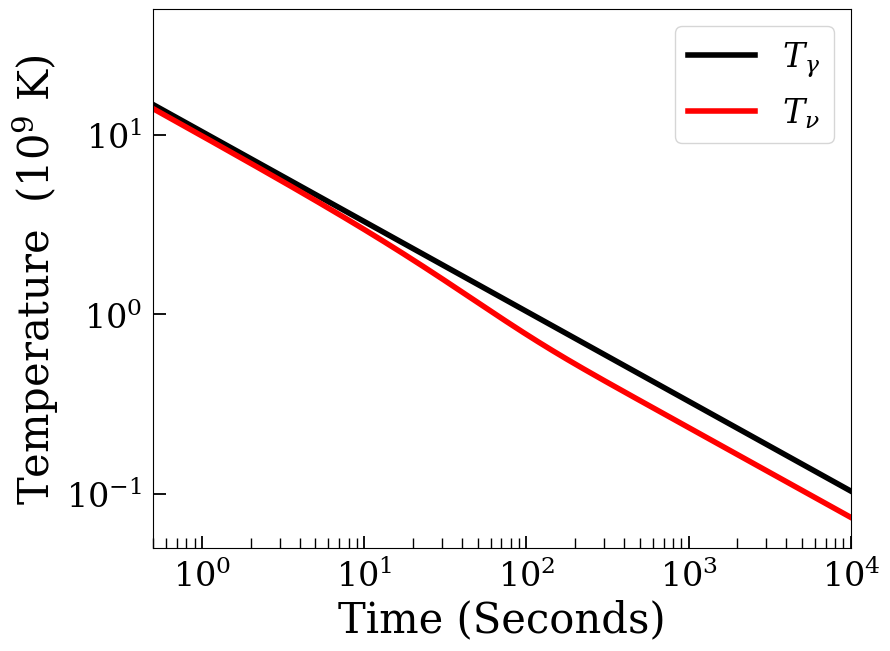

In [3]:
### Plot of Neutrino-Photon Decoupling

matplotlib.rcParams['mathtext.fontset'] = 'cm'
default_fontfam = matplotlib.rcParams['font.family']
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

## Initialize the figure and axis
fig = plt.figure(figsize=(9,7))#, dpi=200)
ax = plt.subplot(111)
ax.set_xlim(5e-1,1e4)
ax.set_ylim(5e-2,5e1)
## RC Parameters
plt.rcParams['lines.linewidth'] = 4
ax.tick_params(axis='both', direction='in', which='major', length = 9, width=1.3, right=False, labelsize=24, pad=8)
ax.tick_params(axis='x', direction='in', length=7, width=1, top=False, which='minor', labelsize=24, pad=8, reset=True)
ax.tick_params(axis='y', direction='in', length=0, width=0, right=False,  which='minor', labelsize=24)

## Labels
#ax.set_title(r'Neutrino Decoupl|ing', fontsize=16)
ax.set_ylabel(r'Temperature  $(10^{9} $ K$)$', fontsize=30);
ax.set_xlabel(r'Time (Seconds)', fontsize=30);

## Plot
ax.loglog(t, T9, color='k');
ax.loglog(t, Tnu9, color='red');

## Captions
labels = [r"$T_{\gamma}$ ", r"$T_{\nu}$"]
legend = ax.legend(labels, fontsize=24)


#### Section 2: The Weak Rates and Nuclear Statistical Equilibrium


The weak interactions are those between protons and neutrons. Namely, the following reactions:

$$n + \nu_e \leftrightarrows p + e^-$$
$$n + e^+ \leftrightarrows p + \overline{\nu}_e$$
$$n \leftrightarrows p + e^- + \overline{\nu}_e$$
We denote the rate $\lambda_{n \rightarrow p}$ as the sum of all of the forward weak reactions and likewise $\lambda_{p \rightarrow n}$ as the sum of all the reverse weak reactions. These rates can be analytically found, as described in the 1983 paper by Scherrer. In this paper, equations 9 and 10 give that the rates are

$$\lambda_{p \rightarrow n} = K \int_1^\infty dx \frac{x(x+q)^2 (x^2 - 1)^{1/2}}{\left(1+e^{-xz}\right)[1 + e^{(x+q)z_{\nu} + \xi_e}]} + K \int_1^\infty dx \frac{x(x-q)^2 (x^2 - 1)^{1/2}}{\left(1+e^{xz}\right)[1 + e^{-(x-q)z_{\nu} + \xi_e}]} \tag{20}$$

and that

$$\lambda_{n \rightarrow p} = \lambda_{n\rightarrow p}(-q,-\xi_e) \tag{21}$$
Where we have that the variables:

- $q = (m_n - m_p)/m_e$ is the neutron-proton mass difference divided by the electron mass
- $z = m_ec^2/k_B T_\gamma$ is a substitution
- $z_\nu = m_ec^2/k_B T_\nu$ is the same as $z$ but for the neutrino temperature
- $K$ is the normalization constant, set so that these integrals go to $1/\tau$ for low temperatures.
- $\xi_e$ is the chemical potential of the electron, taken to be zero.

We elect to solve this by Gauss-Laguerre quadrature below.

In [4]:
### WEAK RATE CALCULATION ####

def WeakRate(T,Tnu):
    '''
    Solves for the weak rates λnp and  λpn by approximating the integral in quadrature. 
    
    INPUT :
    Tγ in MeV [1xn ndarray]
    Tν in MeV [1xn ndarray]
    
    OUTPUTS : 
    λnp [1xn ndarray]
    λpn [1xn ndarray]
    '''
    # The normalization coefficient 
    K = 1/(quad(lambda x: np.sqrt(x**2-1)*x*(q-x)**2, 1, q)[0])* (1/taun)
    
    # Quadrature setup
    N = 128
    points, weights = roots_laguerre(N)
    
    # Shorthands
    x = points
    
    z = np.expand_dims(me/(T),-1)
    x = points + 1 #Shift integral from 0 to infinity to 1 to infinity.
    znu = np.expand_dims(me/(Tnu), -1)

    # Define both integrals, sum, and normalize
    int1 = (x*(x+q)**2 * (x**2 - 1)**(1/2))
    denom1 = ((1+np.exp(-x*z))*(1+np.exp((x+q)*znu)))
    int2 = (x*(x-q)**2 * (x**2 - 1)**(1/2))
    denom2 = ((1+np.exp(x*z))*(1+np.exp(-(x-q)*znu)))

    lpn = K*(int1/denom1+int2/denom2)
    
    # Likewise for reverse
    rint1 = (x*(x-q)**2 * (x**2 - 1)**(1/2))
    rdenom1 = ((1+np.exp(-x*z))*(1+np.exp((x-q)*znu)))
    
    rint2 = (x*(x+q)**2 * (x**2 - 1)**(1/2))
    rdenom2 =((1+np.exp(x*z))*(1+np.exp((-(x+q))*znu)))
    
    lnp = K*(rint1/rdenom1 + rint2/rdenom2)

    # Weight for GL Quadrature
    lnp = lnp*np.exp(x-1)
    lpn = lpn*np.exp(x-1)
    
    # Approximates the integral
    lnp = np.dot(lnp, weights)
    lpn = np.dot(lpn,weights)
    
    return lnp, lpn

weak_pn, weak_np = WeakRate(T,Tnu)

# Quadrature generates NaNs and overflows for some reason at very low temperatures.
weak_pn[np.isnan(weak_pn)] = 0
weak_pn[weak_pn<1e-20]
weak_np[np.isnan(weak_np)] = 1/taun


/tmp/ipykernel_57772/3869864321.py:31: RuntimeWarning: overflow encountered in exp
  denom1 = ((1+np.exp(-x*z))*(1+np.exp((x+q)*znu)))
/tmp/ipykernel_57772/3869864321.py:33: RuntimeWarning: overflow encountered in exp
  denom2 = ((1+np.exp(x*z))*(1+np.exp(-(x-q)*znu)))
/tmp/ipykernel_57772/3869864321.py:33: RuntimeWarning: overflow encountered in multiply
  denom2 = ((1+np.exp(x*z))*(1+np.exp(-(x-q)*znu)))
/tmp/ipykernel_57772/3869864321.py:39: RuntimeWarning: overflow encountered in exp
  rdenom1 = ((1+np.exp(-x*z))*(1+np.exp((x-q)*znu)))
/tmp/ipykernel_57772/3869864321.py:42: RuntimeWarning: overflow encountered in exp
  rdenom2 =((1+np.exp(x*z))*(1+np.exp((-(x+q))*znu)))


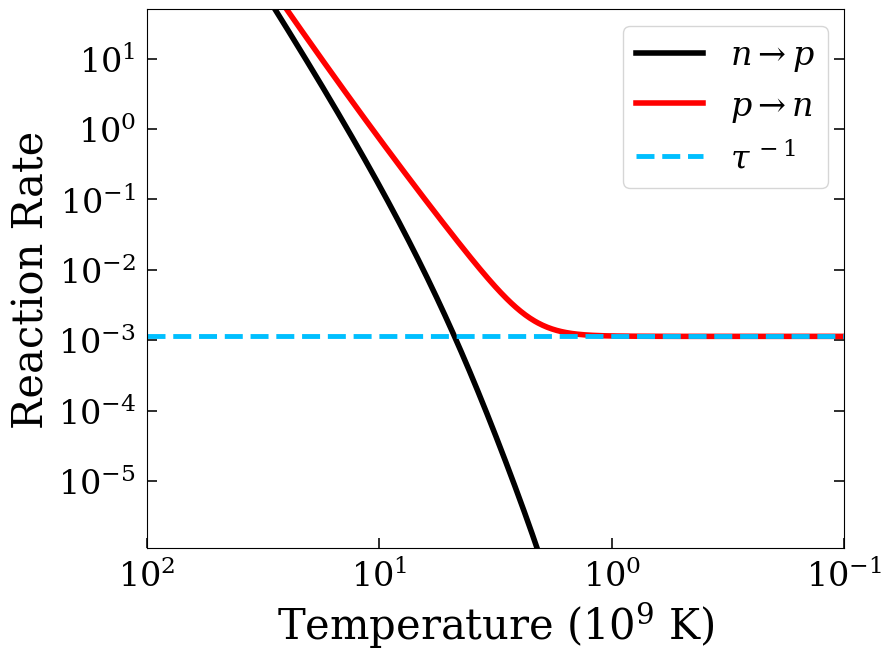

In [5]:
### Plot of Weak Reactions.

## Initialize the figure and axis
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)

ax.tick_params(axis='both', direction='in', which='major', length = 7, width=1.15, right=True, labelsize=24, pad=8)
ax.tick_params(axis='x', direction='in', length=0, width=0.8, right=False, which='minor', labelsize=24)
ax.tick_params(axis='y', direction='in', length=0, width=0.6, right=False,  which='minor', labelsize=24)

## Labels
ax.set_ylabel(r'Reaction Rate', fontsize=30); # ($\rm{cm^3 s^{-1}}$)'
ax.set_xlabel(r'Temperature ($10^9 ~ \rm{K}$)', fontsize=30);

## Plot

ax.loglog(T9,weak_np, color='k');
ax.loglog(T9, weak_pn, color='red');



ax.hlines(taun**(-1), 1e2,1e-3, linestyle = 'dashed', color='deepskyblue', linewidth = 3.5)
ax.set_ylim(1.1e-6,5e1)
ax.set_xlim(1e2,1e-1)

## Legend
labels = [r"$n \rightarrow p$", r"$p \rightarrow n$", r"$\tau^{\,-1}$"]

legend = ax.legend(labels,fontsize=24);
#plt.savefig('/home/aidan/WeakRates.pdf', dpi=250,  bbox_inches='tight')

In equilibrium (for a photon temperature of >0.8 MeV or so), the number density of nuclear species is governed by the Saha equation. We can express the mass fraction of elements immediately before BBN begins by knowing only the binding energy and spin states of each nucleus along with the equilibrium mass fractions of protons and neutrons. This is because at high temperatures, *all* species are in equilibrium with protons and neutrons. In NSE, we can express the number density of nuclei of species $X$ , which would be a light nuclei in our case, such as Deuterium or Tritium, as:

$$\frac{n_X}{n_n n_p} = \frac{m_{s,X}}{4} \left(\frac{2\pi m_X}{m_nm_p T}\right)^{3/2} e^{(m_n + m_p - m_X)/T} \tag{17}$$

Where 

- $n_n$, $n_p$, $n_X$ are the number densities of neutrons, protons, and species $X$ respectively
- $m_{s,X}$ is the number of possible spin states of nucleus $X$
- $m_n$, $m_p$, $m_X$ are the masses of neutrons, protons, and species $X$ and
- T is temperature in MeV

This can be reexpressed as a more useful quantity for our case by expressing the number density of a species with respect to the number density of baryons overall. That rexpression, given in Dodelson and Schmidt's *Modern Cosmology* (equation 4.16), is

$$\frac{n_X}{n_b} \sim \eta_b \left(\frac{T}{m_n}\right)^{3/2} e^{B_X/T} \tag{18}$$

Where $\eta_b$ is the baryon to photon ratio and $B_X$ is the binding energy of a nucleus of species $X$. This relation holds when $\eta_b$ dominates the exponential term, and thus holds well for immediately pre-BBN temperatures, since they are not too high. From Kolb and Turner equation 4.7, we have that the NSE mass fraction of a species X can be expressed as (the somewhat unwieldy) expression:


$$X_A = g_A \left(\zeta (3)^{A-1} \pi^{(1-A)/2} 2^{(3A-5)/2}\right) A^{5/2} \left(\frac{T}{m_n}\right)^{3(A-1)/2} \eta^{A-1} X_p^Z X_n^{A-Z} \exp(B_A/T) \tag{19}$$

These allow us to find our initial conditions, since at high temperatures, NSE will be in play.

In [6]:
### Nuclear Statistical Equilibrium (NSE) ###

def NSEAbundances(T,Bind, A, gA):
    '''
    T - Temperature in MeV
    Bind - Binding energy in MeV
    A - Mass number of the atom
    gA - 
    '''
    coeff = gA * η0**(A-1) * (apery**(A-1) * pow(np.pi, ((1-A)/2)) * pow(2, ((3*A-5)/2))) * A**(5/2)
    #XA = coeff * (T/(A*mn))**((3*(A-1))/2) * np.exp(Bind/T)
    XA = coeff * (T/mn)**((3*(A-1))/2) * np.exp(Bind/T)

    return XA

# Initial conditions for BBN code, NSE abundances of elements.

## Out-front factor is assuming initial conditions at our starting time have Xp ~ Xn, so it is (1/2)^A where A is the mass number.

XDNSE0 = (1/4) * NSEAbundances(T9i, Bd, 2, 3)
XTNSE0 = (1/8) * NSEAbundances(T9i, Bt, 3, 2)
X3NSE0 = (1/8) * NSEAbundances(T9i, B3, 3,2)
X4NSE0 = (1/16) * NSEAbundances(T9i, B4, 4, 1)
XLi7NSE0 = (1/128) * NSEAbundances(T9i, Bli7, 7, 5)
XBe7NSE0 = (1/128) * NSEAbundances(T9i, Bbe7, 7, 5)

X0 = np.zeros(8,)
X0[1] = (np.exp(Q/(T9i))+1)**(-1)
X0[0] = 1 - X0[1]
X0[2] = XDNSE0
X0[3] = XTNSE0
X0[4] = X3NSE0
X0[5] = X4NSE0
X0[6] = XLi7NSE0
X0[7] = XBe7NSE0

#### Section 3: The Strong Rates and The Reaction Network


All reactions between nucleides interacting by way of strong reactions, that is atomic reactions, must also be considered in the big bang nucleosynthesis model. These reactions consist of no more than 4 *distinct* nuclei, which we can express schematically as the nuclear reaction


$$ Y_i + Y_j \underset{[kl]_{ij}}{\overset{[ij]_{kl}}{\rightleftharpoons}} Y_k + Y_l \tag{24}$$


Our strong nuclear rates aretaken from Kawano and Smith's 1993 paper as is, in their polynomial fits. The reason for doing so is that the nuclear physics is quite tedious and we lose little from approximating these rates in this way.


![RXNNetwork](network.png)

    
The strong reaction rates are composed using the reaction cross-section of each reaction, along with other constants. Furthermore, we have that in a generic four-body reaction, say

Where we have two species, $Y_i$ and $Y_j$ combining with a rate $[ij]_{kl}$ to produce the two species $Y_k$ and $Y_l$. The reverse rate, $[kl]_{ij}$ is the rate at which $Y_k$ and $Y_l$ combine and produce $Y_i$ and $Y_j$. We are interested in the forward and reverse rates for our reaction network. They can be computed and generally take the form

$$[ij]_{kl} = \rho_b N_A \langle\sigma v\rangle_{jk}  \tag{25}$$

Where $\rho_b$ is the baryon density, $N_A$ is Avogadro's number, and 

$$\langle \sigma v \rangle_{jk} = \int_0^\infty f(v, T) \sigma (v) v \, dv  \tag{26}$$

is the Boltzmann distribution over the two species and their reaction cross-section $\sigma(v)$.


While this *can* be computed, these rates have already been computed by Fowler, Caughlan, and Zimmerman in their 1975 paper *Thermonuclear Reaction Rates V* or FCZV and in Wagoner 1967. We will use this instead.
We will consider reactions involving/creating protons, neutrons, Deuterium, Tritium, Helium-3, Helium-4, Lithium-6, Lithium-7, Beryllium-6, and Beryllium-7. While other elements are involved in BBN, these represent the vast majority of reactants by mass fraction. 

The reaction network can be constructed as follows

$$\frac{dY_i}{dt} = \sum_{j,k,l}  N_i \left(\frac{Y_k^{N_k}Y_l^{N_l}}{N_k!N_l!} [kl]_{ij} - \frac{Y_i^{N_i}Y_j^{N_j}}{N_i!N_j!} [ij]_{kl}\right)  \tag{27}$$

Which allows us to create a coupled system of first-order non-linear ODEs.

In [7]:
def StrongRates(T9):
    """
    Approximate the strong reaction rates using Kawano & Smith's 1993 polynomial approximations. 
    
    INPUT: 
    T9 - Temperature array in 10^9 Kelvins. TYPE : [1xn] or [n] ndarray or equivalent.
    
    OUTPUTS:
    Forward - Reaction rates in cubic cm per second per mole. TYPE : [11xn] ndarray
    Reverse - Reverse reaction rates in the same units. Same type. 
    """
    
    # A word of warning to those who want to code this-- Use an Einstein sum. Especially for bigger networks/stellar nucleosynthesis.
    #  I had already written the reaction network by the time I figured out that trivializes it and makes it much more compact.
    T = K9toMeV(T9)

    h= 3.33683e4*η0
    rhob = h*(T9)**3

    # Shorthands introduced by Kawano 1993
    
    T9a = T9/(1 + 0.1378*T9)
    T9b = T9/(1 + 0.1071*T9)
    T9c = T9/(1 + 0.759*T9)
    T9d = T9/(1 + 13.08*T9)
    
    
    # Forward Rates are polynomial fits, pulled from Table 2 of Kawano 1993. They are reaction cross-sections.
    
    # This is <01> * NA
    crosssection = np.asarray([
    
        #1. p + n --> D + γ
        4.742e4 * (1 - 0.8504 * T9**(1/2) + 0.49 * T9 - 0.0962 * T9**(3/2) + 8.47e-3 * T9**(2) - 2.8e-4 * T9**(5/2)),
    
        #2. D + p --> He3 + γ
        2.65e3 * T9**(-2/3) * np.exp(-3.720/(T9**(1/3))) * (1 + 0.112*T9**(1/3) + 1.99*T9**(2/3) + 1.56*T9 + 0.162*T9**(4/3) + 0.324*T9**(5/3)),
        
        #3. D + D --> n + He3
        3.95e8 * T9**(-2/3) * np.exp(-4.259/(T9**(1/3))) *(1 + 0.098*T9**(1/3) + 0.765*T9**(2/3) + 0.525*T9 + 9.61e-3 * T9**(4/3) + 0.0167*T9**(5/3))\
            *(1),
        
        #4. D + D --> p + T
        4.17e8 * T9**(-2/3) * np.exp(-4.258/(T9**(1/3))) * (1 + 0.098*T9**(1/3) + 0.518*T9**(2/3) + 0.355*T9 - 0.01*T9**(4/3) - 0.018 * T9**(5/3))\
            *(1),
        
        #5. He3 + n --> p + T
        7.21e8 * (1-0.508*T9**(1/2) + 0.228*T9),

        #6. T + D --> n + He4
        1.063e11 * T9**(-2/3) * np.exp(-4.559/(T9**(1/3)) - (T9/0.0754)**2) * (1 + 0.092*T9**(1/3) - 0.375*T9**(2/3) - 0.242*T9 + 33.82*T9**(4/3) + 55.42*T9**(5/3)) + 8.047e8*T9**(-2/3) * np.exp(-0.4857/T9),
        
        #7. He3 + D --> p + He4
        5.021e10 * T9**(-2/3) * np.exp(-7.144/(T9**(1/3)) - (T9/0.27)**2) * (1 + 0.058*T9**(1/3) + 0.603*T9**(2/3) + 0.245*T9 + 6.97*T9**(4/3) + 7.19*T9**(5/3)) + 5.212e8*T9**(-1/2) * np.exp(-1.762/T9),
        
        #8. He3 + He4 --> Be7 + γ
        4.817e6 * T9**(-2/3) * np.exp(-14.964/(T9**(1/3))) * (1 + 0.0325*T9**(1/3) - 1.04e-3 * T9**(2/3) - 2.37e-4 * T9 - 8.11e-5 * T9**(4/3) - 4.69e-5 * T9**(5/3)) + 5.938e6*T9b**(5/6)* T9**(-3/2) * np.exp(-12.859/(T9b**(1/3))),
    

        #9. T + He4 --> Li7 + γ
        3.032e5 * T9**(-2/3) * np.exp(-8.090/(T9**(1/3))) * (1 + 0.0516*T9**(1/3) + 0.0229*T9**(2/3) + 8.28e-3*T9 - 3.28e-4*T9**(4/3) - 3.01e-4*T9**(5/3)) + 5.109e5*T9a**(5/6) * T9**(-3/2) * np.exp(-8.068/(T9a**(1/3))),
        
        
        #10. Be7 + n --> p + Li7
        2.675e9 * (1 + 0.56*T9**(1/2) + 0.179*T9 - 0.0283*T9**(3/2) + 2.21e-3 * T9**2 - 6.85e-5 * T9**(5/2)) + 9.391e8 * T9d**(3/2) * T9**(-3/2) + 4.467e7*T9**(-3/2) * np.exp(-0.07486/T9),
        

        #11. Li7 + p --> He4 + He4
        1.096e9 * T9**(-2/3) * np.exp(-8.472/(T9**(1/3))) - 4.83e8*T9c**(5/6) * T9**(-3/2) * np.exp(-8.472/(T9c**(1/3))) + 1.06e10 * T9**(-3/2)* np.exp(-30.442/T9) + 1.56e5 * T9**(-2/3) * np.exp(-8.472/(T9**(1/3)) - (T9/1.696)**2) * (1 + 0.049*T9**(1/3) - 2.5*T9**(2/3) + 0.86*T9 + 3.52*T9**(4/3) + 3.08*T9**(5/3)) + 1.55e6 * T9**(-3/2) * np.exp(-4.478/T9)\
        *(1)
        ])
    
    # Eq. 40 in the text.
    ForwardRate = (crosssection)*rhob

    mass_excess = 11.605 * np.array([
        (mn+mp)- md, (md + mp)-m3, (md+md)-(mn + m3), (md + md)-(mp + mt), (m3 + mn)-(mp + mt), (mt+md)-(mn+m4), (m3+md)-(mp+m4), (m3 +m4)-(mbe7), (mt + m4)-(mli7), (mn + mbe7)-(mp+mli7), (mli7+mp)-(m4+m4)
        ])
    
    an, ap, ad, at, a3, a4, ali7, abe7 = np.array([mn, mp, md, mt, m3, m4, mli7, mbe7])/amu

    conversion = 0.98677e10
    prefactors = np.array([

        ## A = 1 for p & n, = 2 for D, = 3 for T & He3, = 4 for He4, = 7 for Be7 and Li7
        ## g = 2 for n,p, T, He3, g=3 for D, g=1 for He4, g=4 for Li7 and Be7.
        ## Below is (g)*(A)^3/2 * exp(-Q/T) and, in the case of photon emission, multiplied by the corrective factor in Eq. 42.

        #1. p + n --> D + γ
        conversion*((2*2)/(3) * ((an*ap)/(ad))**(3/2)* rhob**(-1) * T9**(3/2) * np.exp(-mass_excess[0]/(T9))),#/((2*np.pi)**1.5*(hbar*c)**3),#((2*2)/(3) * ((mn*mp)/(md))**(3/2)* rhob**(-1) * T**(3/2) * np.exp(-mass_excess[0]/(T)))/((2*np.pi)**1.5*(hbar*c)**3),
        #2. D + p --> He3 + γ
        conversion*((3*2)/(2) * ((ad*ap)/(a3))**(3/2)* rhob**(-1) * T9**(3/2)* np.exp(-mass_excess[1]/(T9))) ,
        #3. D + D --> n + He3
        (3*3)/(2*2) * ((ad*ad)/(an*a3))**(3/2)* np.exp(-mass_excess[2]/(T9)),
        #4. D + D --> p + T
        (3*3)/(2*2) * ((ad*ad)/(ap*at))**(3/2)* np.exp(-mass_excess[3]/(T9)),
        #5. He3 + n --> p + T
        (2*2)/(2*2) * ((a3*an)/(ap*at))**(3/2)* np.exp(-mass_excess[4] /(T9)),
        #6. T + D --> n + He4
        (2*3)/(2*1) * ((at*ad)/(an*a4))**(3/2)* np.exp(-mass_excess[5]/(T9)),
        #7. He3 + D --> p + He4
        (2*3)/(2*1) * ((a3*ad)/(ap*a4))**(3/2)* np.exp(-mass_excess[6]/(T9)),
        #8. He3 + He4 --> Be7 + γ
        conversion*((2*1)/(4) * ((a3*a4)/(abe7))**(3/2)* rhob**(-1) * T9**(3/2)* np.exp(-mass_excess[7]/(T9))),
        #9. T + He4 --> Li7 + γ
        conversion*((2*1)/(4) * ((at*a4)/(ali7))**(3/2)* rhob**(-1) * T9**(3/2)* np.exp(-mass_excess[8]/(T9))),
        #10. Be7 + n --> p + Li7
        (2*4)/(2*4) * ((an*abe7)/(ap*ali7))**(3/2)* np.exp(-mass_excess[9]/(T9)),
        #11. Li7 + p --> He4 + He4 
        (4*1)/(1*1) * ((ali7*ap)/(a4*a4))**(3/2)* np.exp(-mass_excess[10]/(T9))
        ])


    ReverseRate = prefactors*ForwardRate

    return np.asarray([ForwardRate, ReverseRate])#, crosssection, mass_excess

ForwardRate, ReverseRate = StrongRates(T9)

In [8]:
interpolation = interpolate.interp1d(t, [T9,T, weak_np, weak_pn], 'cubic',fill_value='extrapolate') # Allows us to call functions within this function.

def BBN(t,Y):
    
    Yp, Yn, YD, YT, YHe3, YHe4, YBe7, YLi7 = Y
     
    T9,T, np,pn = interpolation(t)
    
    T9 = 10.4*(t)**(-1/2)

    F, R = StrongRates(T9)

    #1. p + n <--> D + γ

    #2. D + p <--> He3 + γ
 
    #3. D + D <--> n + He3

    #4. D + D <--> p + T

    #5. He3 + n <--> p + T

    #6. T + D <--> n + He4

    #7. He3 + D <--> p + He4

    #8. He3 + He4 <--> Be7 + γ

    #9. T + He4 <--> Li7 + γ

    #10. Be7 + n <--> p + Li7

    #11. Li7 + p <--> He4 + He4

    #YD = YD * 1/2
    #YT = YT * 1/3
    #YHe3 = YHe3 * 1/3
    #YLi7 = YLi7* 1/7
    #YBe7 = YBe7 * 1/7

    
    dYpF = -np*Yp + pn*Yn - F[0]*Yp*Yn - F[1]*Yp*YD + (1/2) * F[3]*YD**2 + F[4]*YHe3*Yn + F[6]*YHe3*YD + F[9]*YBe7*Yn - F[10]*YLi7*Yp
    dYnF = -pn*Yn + np*Yp - F[0]*Yp*Yn +  (1/2) * F[2]*YD**2 - F[4]*YHe3*Yn + F[5]*YT*YD - F[9]*YBe7*Yn
    dYDF = F[0]*Yp*Yn - F[1]*Yp*YD - F[2]*YD**2 - F[3]*YD**2 - F[5]*YT*YD - F[6]*YHe3*YD
    dYTF = (1/2)* F[3]*YD**2 + F[4]*YHe3*Yn - F[5]*YT*YD - F[8]*YT*YHe4
    dYHe3F = F[1]*Yp*YD +  (1/2) *F[2]*YD**2 - F[4]*YHe3*Yn - F[6]*YHe3*YD - F[7]*YHe4*YHe3
    dYHe4F = F[5]*YT*YD + F[6]*YHe3*YD - F[7]*YHe4*YHe3 - F[8]*YT*YHe4 + 2*F[10]*YLi7*Yp
    dYBe7F = F[7]*YHe4*YHe3 - F[9]*YBe7*Yn
    dYLi7F = F[8]*YT*YHe4 + F[9]*YBe7*Yn - F[10]*YLi7*Yp 

    dYpR = R[0]*YD + R[1]*YHe3 - R[3]*Yp*YT - R[4]*Yp*YT - R[6]*YHe4*Yp - R[9]*YLi7*Yp + (1/2) * R[10]*YHe4**2
    dYnR = R[0]*YD - R[2]*YHe3*Yn + R[4]*Yp*YT - R[5]*YHe4*Yn + R[9]*YLi7*Yp
    dYDR = -R[0]*YD + R[1]*YHe3 + 2*R[2]*YHe3*Yn + 2*R[3]*Yp*YT + R[5]*YHe4*Yp + R[6]*YHe4*Yp
    dYTR = - R[3]*Yp*YT - R[4]*Yp*YT + R[5]*YHe4*Yp + R[8]*YLi7
    dYHe3R = -R[1]*YHe3 - R[2]*YHe3*Yn + R[4]*Yp*YT + R[6]*YHe4*Yp + R[7]*YBe7
    dYHe4R = -R[5]*YHe4*Yn - R[6]*YHe4*Yp + R[7]*YBe7 + R[8]*YLi7 - (1/2) *R[10]*YHe4**2
    dYBe7R = -R[7]*YBe7 + R[9]*YLi7*Yp
    dYLi7R = -R[8]*YLi7 - R[9]*YLi7*Yp +  (1/2) * R[10]*YHe4**2 

    dYp = dYpF + dYpR
    dYn = dYnF + dYnR
    dYD = dYDF + dYDR
    dYT = dYTF+dYTR
    dYHe3 = dYHe3F + dYHe3R
    dYHe4 = dYHe4F + dYHe4R
    dYBe7 = dYBe7F + dYBe7R
    dYLi7 = dYLi7F + dYLi7R

    return dYp, dYn, dYD, dYT, dYHe3, dYHe4, dYBe7, dYLi7

In [9]:
# Solve the ODE
Y = solve_ivp(BBN, t[[0,-1]], X0, t_eval=t, dense_output=True, method='Radau',rtol=1e-15,atol=1e-13)
print(Y)

/home/aidan/micromamba/envs/physics/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 8.035e-05  8.222e-05 ...  7.852e+05  8.035e+05]
        y: [[ 5.003e-01  5.036e-01 ...  7.258e-01  7.258e-01]
            [ 4.997e-01  4.964e-01 ...  1.818e-15  2.376e-15]
            ...
            [ 4.577e-53  1.688e-63 ...  3.526e-11  3.526e-11]
            [ 4.571e-53  1.773e-63 ...  4.553e-11  4.553e-11]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x74cf6673a2d0>
 t_events: None
 y_events: None
     nfev: 87736
     njev: 730
      nlu: 9208


The final mass fraction of Hydrogen (protons) is  0.7258
The final mass fraction of Helium 4 (Yp) is  0.2741
----------------------------- 

The final percentage of mass fraction of p is  1
The final percentage of mass fraction of n is  3.273e-15
The final percentage of mass fraction of D is  0.0001255
The final percentage of mass fraction of T is  6.469e-07
The final percentage of mass fraction of 3 is  4.252e-05
The final percentage of mass fraction of 4 is  0.3776
The final percentage of mass fraction of Be is  3.4e-10
The final percentage of mass fraction of Li is  4.391e-10
The total sum of elements is: 100 %.


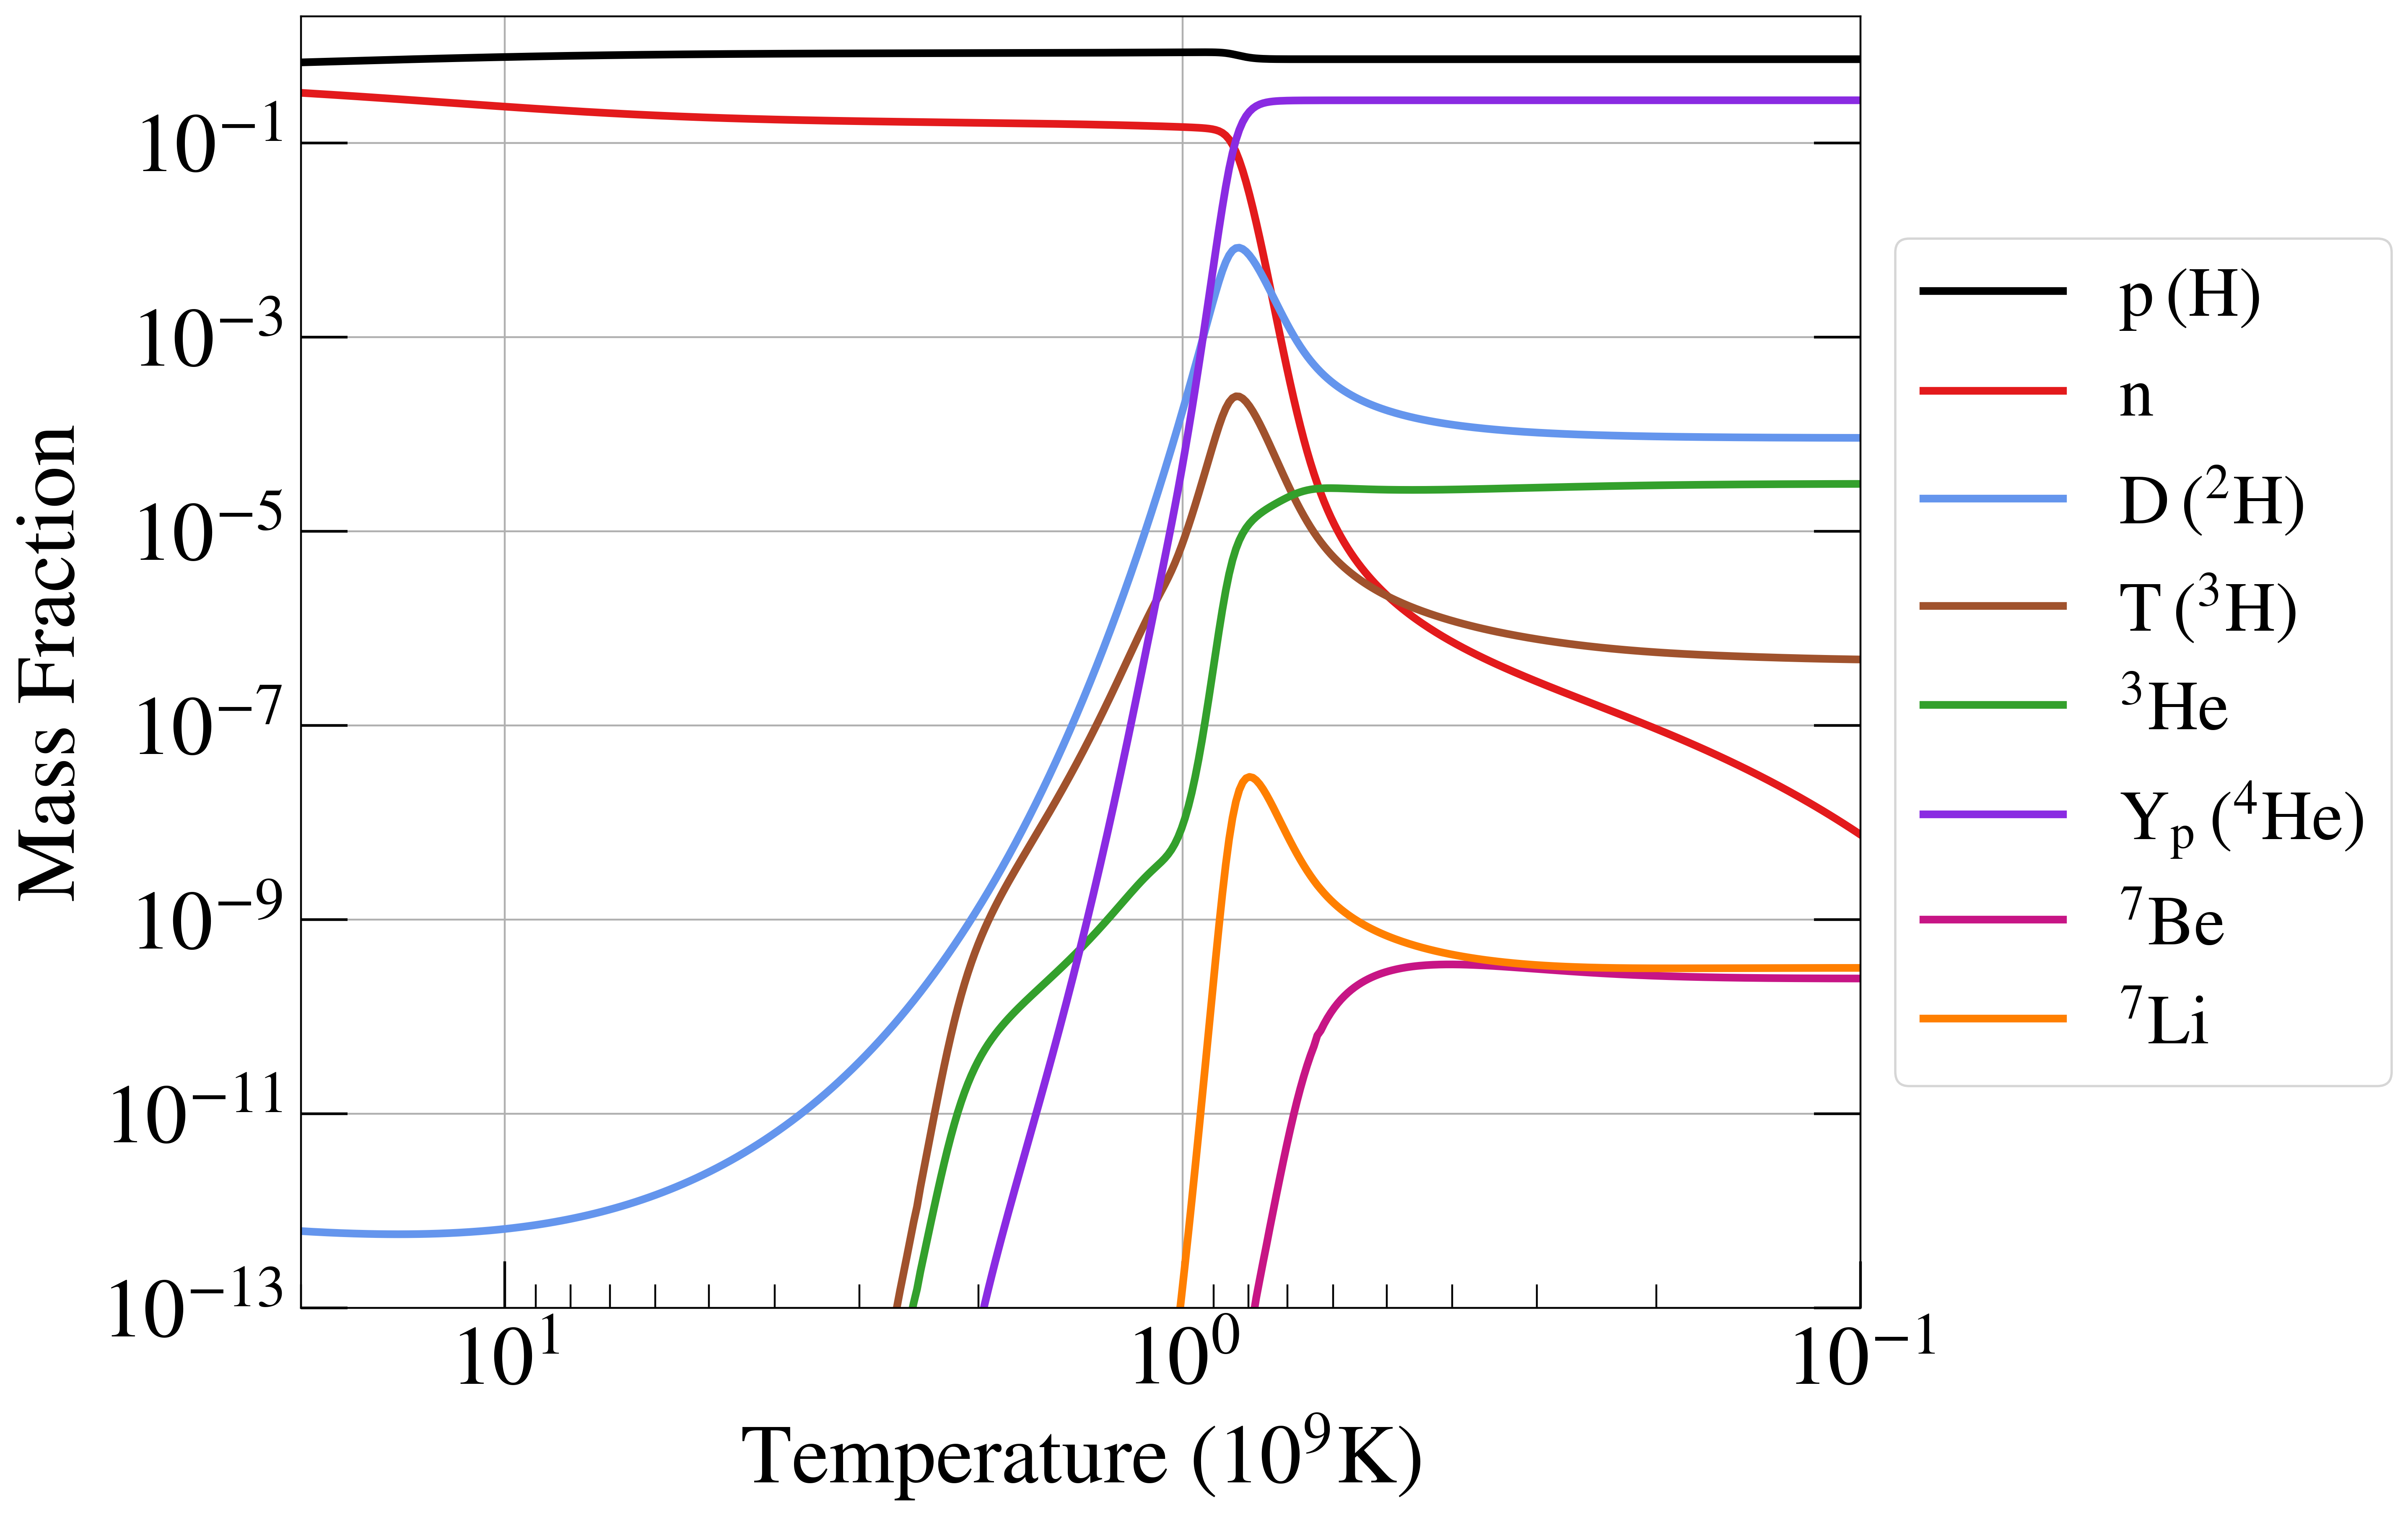

In [11]:
weights = np.array([1,1,2,3,3,4,7,7])
#weights = np.array([mp/amu, mn/amu, md/amu, mt/amu, m3/amu, m4/amu, mbe7/amu, mli7/amu])
## Initialize the figure and axis
fig = plt.figure(figsize=(15,10), dpi=400)
ax = plt.subplot(111)
ax.grid()


#colors = ['darkblue', 'red', 'palevioletred', 'coral', 'mediumslateblue', 'darkolivegreen','darkturquoise', 'goldenrod', 'firebrick']
colors = ['black', '#e31a1c', 'cornflowerblue', 'sienna', '#33a02c', 'blueviolet', 'mediumvioletred', '#ff7f00', '#cab2d6']
## Plot
for n in range(8):
    ax.loglog(T9, weights[n]*(Y.y[n]), c=colors[n])

## Legend
labels = [r'$\rm p \, (H)$', 'n', r'$\rm D \, (^2 H)$', r'$\rm T \, (^3 H)$', r'$\rm ^3He$', r'$\rm Y_p \, (^4 He)$', r'$\rm ^7Be$', r'$\rm ^7Li$']


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(labels, loc='center left', bbox_to_anchor=(1,0.5), fontsize=30)

## Tick and Ruling Parameters
from matplotlib.ticker import LogFormatterSciNotation, LogLocator
#ax.set_xlim(1e2,1e-1);
ax.set_xlim(20,1e-1)
ax.set_ylim(1e-13,2e0)


ax.tick_params(axis='both', direction='in', which='major', length = 20, width=1.15, right=True, labelsize=36, pad=8)
ax.tick_params(axis='x', direction='in', length=10, width=0.8, right=True, which='minor')
ax.tick_params(axis='y', direction='in', length=20, width=0.6, right=True,  which='minor', labelsize=15)

ax.xaxis.set_minor_locator(LogLocator())
ax.yaxis.set_minor_locator(LogLocator())
ax.xaxis.set_minor_formatter(LogFormatterSciNotation())
ax.yaxis.set_minor_formatter(LogFormatterSciNotation())
ax.minorticks_on()

## Labels

#ax.set_title('Mass Fraction of Elements in BBN')
ax.set_ylabel('Mass Fraction', fontsize=36)
ax.set_xlabel(r'Temperature ($\rm{10^9 K}$)', fontsize=36);

textlabels = ['p','n','D','T','3','4','Be','Li']
print(f'The final mass fraction of Hydrogen (protons) is {weights[0]*(Y.y[0][-1]) : 0.4g}')
print(f'The final mass fraction of Helium 4 (Yp) is {weights[5]*(Y.y[5][-1]) : 0.4g}')
print('----------------------------- \n')
for n in range(8):
    print(f'The final percentage of mass fraction of',textlabels[n],f'is {weights[n]*(Y.y[n][-1])/Y.y[0][-1] : 0.4g}')
sum = 0
for n in range(8):
    sum += weights[n]*Y.y[n][-1]
    
print(f'The total sum of elements is: {sum*100:0.3g} %.')